In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
img = Image.open("mesh2.jpg",)
arr = np.array(img)


In [3]:
print(arr.shape)

(967, 813, 3)


In [4]:
arr = arr.sum(axis=-1) // 3

In [32]:
import pic_filters as pf
arr2 = pf.laplassian(arr, "s")

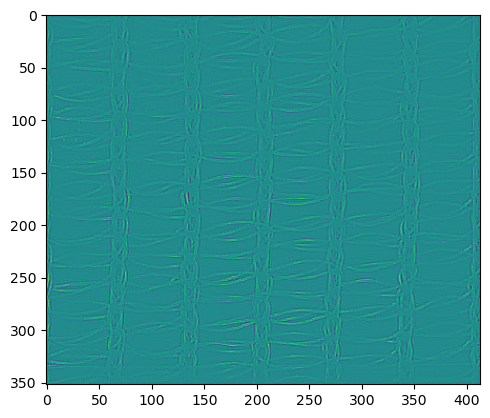

In [22]:
plt.imshow(arr2)
plt.show()

<BarContainer object of 256 artists>

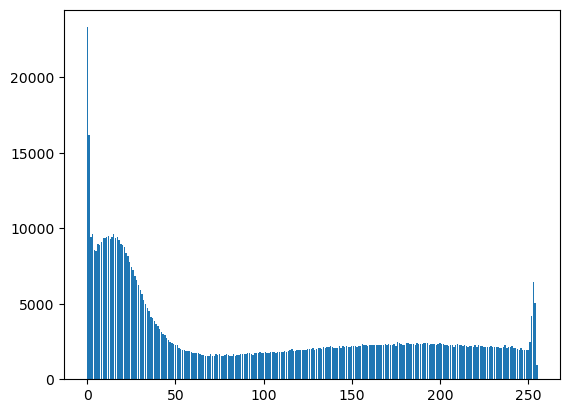

In [5]:
plt.bar(range(256), np.histogram(arr, bins=256)[0])

In [33]:
min=np.min(arr)        # result=144
max=np.max(arr)        # result=216

# Make a LUT (Look-Up Table) to translate image values
LUT=np.zeros(256,dtype=np.uint8)
LUT[min:max+1]=np.linspace(start=0,stop=255,num=(max-min)+1,endpoint=True, dtype=np.uint8)


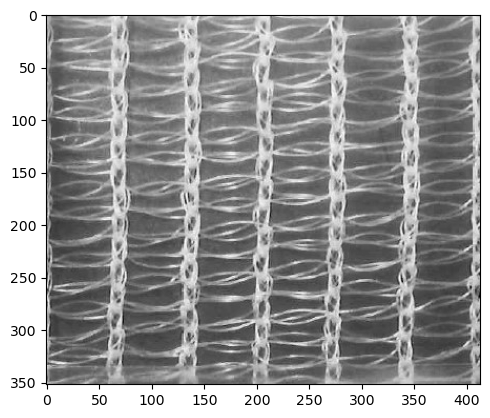

In [41]:
contrast = LUT[arr]
plt.imshow(contrast, cmap="gray")

In [6]:
arr_b = arr < 50

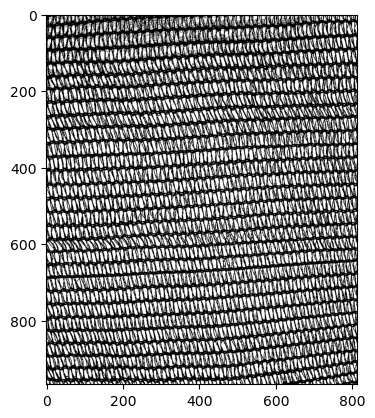

In [7]:
plt.imshow(arr_b, cmap="gray")

In [66]:
print(arr_b.sum() / (arr_b.shape[0]*arr_b.shape[1]))

In [14]:
np.sum(arr_b == False) / (arr_b.shape[0]*arr_b.shape[1])


0.546018614270941

In [11]:
print(arr_b)

[[False False False ...  True  True False]
 [ True  True False ...  True  True False]
 [False False False ...  True  True False]
 ...
 [ True False False ... False False False]
 [False  True False ... False False False]
 [False  True False ...  True False False]]
